In [18]:
### General imports ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from time import sleep
import seaborn as sns
import re
import os
import argparse
from collections import OrderedDict
import matplotlib.animation as animation
from xgboost import XGBClassifier


In [19]:
### Image processing ###
from scipy.ndimage import zoom
from scipy.spatial import distance
import imutils
from scipy import ndimage
import cv2
import dlib
from __future__ import division
from imutils import face_utils

In [20]:
### Deep Learning models ###
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, SeparableConv2D, ZeroPadding2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D, AveragePooling2D
#from tensorflow. keras.utils import np_utils
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import models
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.applications import densenet
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [21]:
### Build SVM models ###
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [22]:
### Same trained models ###
import h5py
from keras.models import model_from_json
import pickle

from PIL import Image
from skimage.transform import resize




In [ ]:
!pip install keras-vis

In [23]:
from vis.losses import ActivationMaximization
from vis.regularizers import TotalVariation, LPNorm
from vis.input_modifiers import Jitter
from vis.optimizer import Optimizer
from vis.callbacks import GifGenerator

In [24]:
### Visualization ###
!pip3 install --quiet ggplot
#from ggplot import *
import time
from sklearn.manifold import TSNE
##from vis.visualization import visualize_cam, visualize_saliency, overlay
from vis.utils import utils

In [ ]:
!pip3 install --quiet ggplot

Import data



In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
xTrain2 = ("drive/My Drive/images/train")
yTrain2 = ("drive/My Drive/images/validation")
XTest2 = ("drive/My Drive/images//images/train")
YTest2 = ("drive/My Drive/images/images/validation")



In [ ]:
!pip install keras --upgrade

In [ ]:
label = { 0: "Angry",
       1: "Disgust",
       2:"Fear",
       3:"Happy",
       4:"Sad",
       5:"Surprise",
       6:"Neutral"}

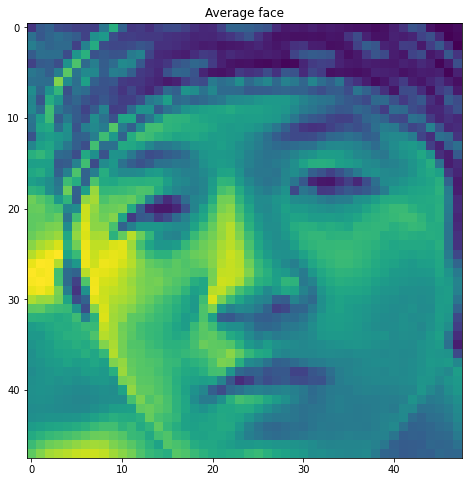

In [ ]:
import matplotlib.image as mpimg
plt.figure(figsize=(12,8))
image = mpimg.imread("drive/My Drive/images/train/neutral/11.jpg")
plt.imshow(image)
plt.title("Average face")
plt.show()

In [ ]:


images = sorted(os.listdir("drive/My Drive/images/train/happy"))

video_array = []

video_array = []
for image in images:
    im = Image.open("drive/My Drive/images/train/happy/28.jpg")
    video_array.append(np.asarray(im)) #.transpose(1, 0, 2))

video_array = np.array(video_array)
print(video_array.shape)
print(video_array)



(7164, 48, 48)
[[[209 209 211 ...  41  30  39]
  [213 212 208 ...  44  38  44]
  [207 209 215 ...  43  38  38]
  ...
  [136 113 171 ...  84 175 222]
  [115 125 184 ...  80 107 203]
  [101 151 180 ...  86  84 142]]

 [[209 209 211 ...  41  30  39]
  [213 212 208 ...  44  38  44]
  [207 209 215 ...  43  38  38]
  ...
  [136 113 171 ...  84 175 222]
  [115 125 184 ...  80 107 203]
  [101 151 180 ...  86  84 142]]

 [[209 209 211 ...  41  30  39]
  [213 212 208 ...  44  38  44]
  [207 209 215 ...  43  38  38]
  ...
  [136 113 171 ...  84 175 222]
  [115 125 184 ...  80 107 203]
  [101 151 180 ...  86  84 142]]

 ...

 [[209 209 211 ...  41  30  39]
  [213 212 208 ...  44  38  44]
  [207 209 215 ...  43  38  38]
  ...
  [136 113 171 ...  84 175 222]
  [115 125 184 ...  80 107 203]
  [101 151 180 ...  86  84 142]]

 [[209 209 211 ...  41  30  39]
  [213 212 208 ...  44  38  44]
  [207 209 215 ...  43  38  38]
  ...
  [136 113 171 ...  84 175 222]
  [115 125 184 ...  80 107 203]
  [101 151 18

In [26]:
X_train = np.load("drive/My Drive/Colab Notebooks/npy f/X_train (1).npy")
y_train = np.load("drive/My Drive/Colab Notebooks/npy f/y_train (6).npy")
X_test = np.load("drive/My Drive/Colab Notebooks/npy f/X_test.npy")
y_test = np.load("drive/My Drive/Colab Notebooks/npy f/y_test.npy")

In [27]:
shape_x = 48
shape_y = 48
nRows,nCols,nDims = X_train.shape[1:]
input_shape = (nRows, nCols, nDims)
classes = np.unique(y_train)
nClasses = len(classes)

In [28]:

class_weight = {
    0:1/sum(y_train[:,0]), 
    1:1/sum(y_train[:,1]), 
    2:1/sum(y_train[:,2]), 
    3:1/sum(y_train[:,3]),
    4:1/sum(y_train[:,4]),
    5:1/sum(y_train[:,5]),
    6:1/sum(y_train[:,6])
}

Preprocessing


Class Classification

In [ ]:
model = XGBClassifier()
model.fit(X_train[:10000].flatten().reshape(-1, 48*48), np.argmax(y_train[:10000], axis=1).reshape(-1,1))
# feature importance
print(model.feature_importances_)

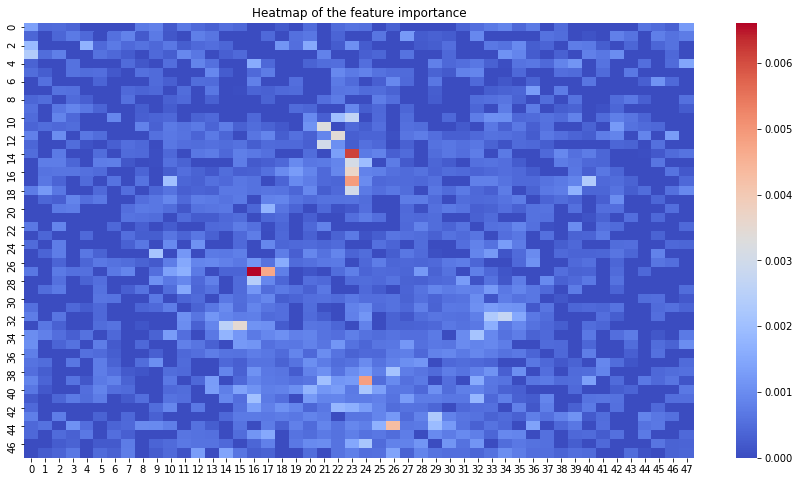

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(model.feature_importances_.reshape(48,48), cmap='coolwarm')
plt.title("Heatmap of the feature importance")
plt.show()

Avarage Face heatmap

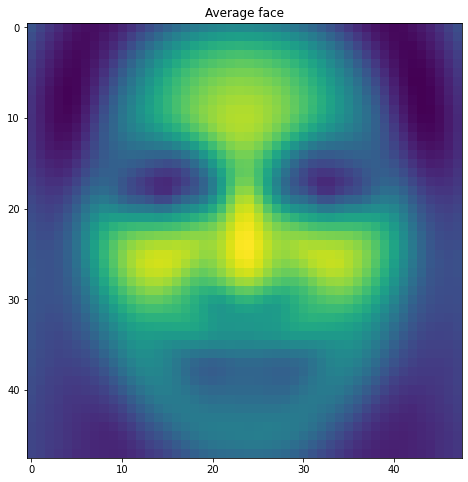

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(np.mean(X_train, axis=0).reshape(48,48))
plt.title("Average face")
plt.show()

In [ ]:
Emotion = { 0: "Angry",
       1: "Disgust",
       2:"Fear",
       3:"Happy",
       4:"Sad",
       5:"Surprise",
       6:"Neutral"}

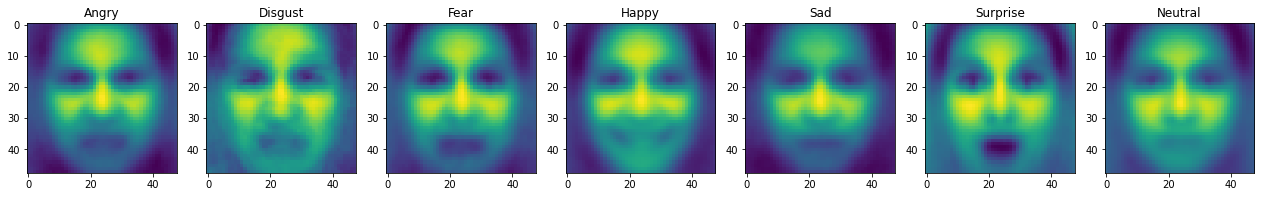

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(22, 8))

for i, ax in enumerate(axes):
    ax.imshow(np.mean(X_train[np.argmax(y_train, axis=1) == i], axis=0).reshape(48,48))
    ax.set_title(Emotion[i])

Image Encoding using auto encoredr

In [ ]:
input_img = Input(shape=(shape_x, shape_y, 1))

# Ecoding
x = Conv2D(1, (5, 5), padding='same', activation='relu')(input_img)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(1, (5, 5), padding='same', activation='relu')(x)
encoded = MaxPooling2D(pool_size=(2,2), padding='same')(x)


# Decoding
x = Conv2D(1,(5, 5), padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(1,(5, 5), padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1,(3, 3), padding='same', activation = 'linear')(x)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 1)         26        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 1)         26        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 1)         26        
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 24, 24, 1)        

Training Encoder

In [ ]:
epochs = 30
batch_size = 16

history = autoencoder.fit( X_train.reshape(-1, shape_x, shape_y, 1), X_train.reshape(-1, shape_x, shape_y, 1), batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/30
1436/1436 [==============================] - 66s 46ms/step - loss: 0.0381 - val_loss: 0.0154
Epoch 2/30
1436/1436 [==============================] - 65s 46ms/step - loss: 0.0137 - val_loss: 0.0128
Epoch 3/30
1436/1436 [==============================] - 66s 46ms/step - loss: 0.0124 - val_loss: 0.0120
Epoch 4/30
1436/1436 [==============================] - 66s 46ms/step - loss: 0.0118 - val_loss: 0.0117
Epoch 5/30
1436/1436 [==============================] - 65s 45ms/step - loss: 0.0115 - val_loss: 0.0114
Epoch 6/30
1436/1436 [==============================] - 65s 45ms/step - loss: 0.0113 - val_loss: 0.0113
Epoch 7/30
1436/1436 [==============================] - 64s 45ms/step - loss: 0.0112 - val_loss: 0.0112
Epoch 8/30
1436/1436 [==============================] - 70s 49ms/step - loss: 0.0112 - val_loss: 0.0112
Epoch 9/30
1436/1436 [==============================] - 67s 47ms/step - loss: 0.0111 - val_loss: 0.0111
Epoch 10/30
1436/1436 [==============================] - 66s 46m

In [ ]:
encoder = Model(inputs = input_img, outputs = encoded)
encoded_imgs = encoder.predict(X_train.reshape(-1,shape_x, shape_y, 1))
decoded_imgs = autoencoder.predict(X_train.reshape(-1,shape_x, shape_y, 1))

Loss curves of auto encorder

Text(0.5, 1.0, 'Loss Curves')

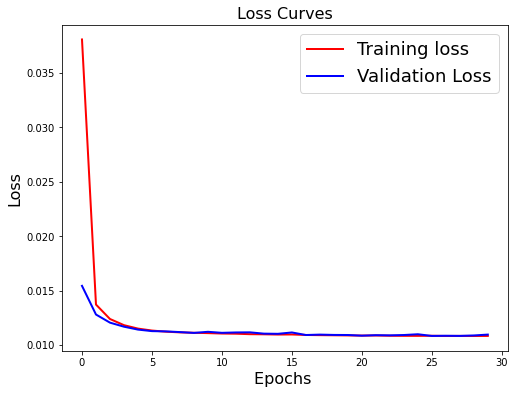

In [ ]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Plot the original iage and after encording

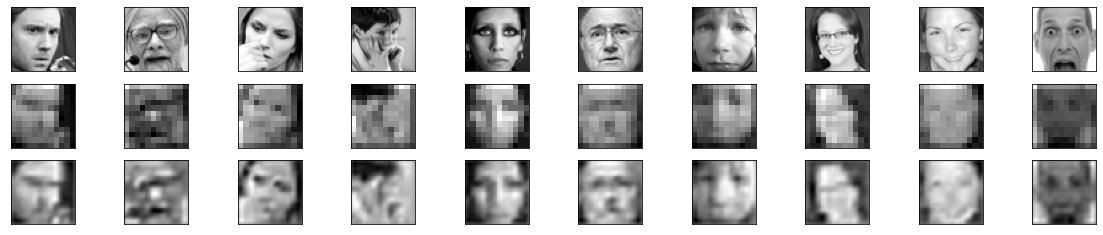

In [ ]:
n = 10  
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_train[i].reshape(shape_x, shape_y), cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Encoded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(12,12), cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(shape_x, shape_y), cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

tSNE - ML algorithm used for embeding high dimentional space to low

In [ ]:
rndperm = np.random.permutation(np.reshape(encoded_imgs, (-1,12*12)).shape[0])

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(np.reshape(encoded_imgs, (-1,12*12))[rndperm[:n_sne]])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.111s...
[t-SNE] Computed neighbors for 7000 samples in 15.583s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 0.675751
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.612946
[t-SNE] KL divergence after 300 iterations: 2.981169


In [ ]:
df_tsne = pd.DataFrame(np.reshape(encoded_imgs, (-1,12*12))[rndperm[:n_sne],:])
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne['label'] = pd.DataFrame(y_train).idxmax(axis=1)[rndperm[:n_sne]]

chart = ggplot(df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + scale_color_brewer(type='diverging', palette=4) \
        + ggtitle("tSNE dimensions colored by label")
chart

NameError: ignored

In [ ]:
def createModel():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(7))
    model.add(Activation('softmax'))

    return model 
model = createModel()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_14 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 128)      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 128
epochs = 30

history_cnn_1 = model.fit(
    X_train, y_train, 
    epochs = epochs, 
    batch_size=batch_size,
    validation_data=(X_test, y_test), 
    class_weight=class_weight)

Epoch 1/30
225/225 [==============================] - 662s 3s/step - loss: 4.9131e-04 - accuracy: 0.2133 - val_loss: 1.9287 - val_accuracy: 0.1691
Epoch 2/30
225/225 [==============================] - 659s 3s/step - loss: 4.1937e-04 - accuracy: 0.3282 - val_loss: 1.7655 - val_accuracy: 0.3204
Epoch 3/30
225/225 [==============================] - 663s 3s/step - loss: 3.7016e-04 - accuracy: 0.4046 - val_loss: 1.6862 - val_accuracy: 0.3394
Epoch 4/30
225/225 [==============================] - 660s 3s/step - loss: 3.3933e-04 - accuracy: 0.4528 - val_loss: 1.4086 - val_accuracy: 0.4681
Epoch 5/30
225/225 [==============================] - 660s 3s/step - loss: 3.1467e-04 - accuracy: 0.4912 - val_loss: 1.4300 - val_accuracy: 0.4452
Epoch 6/30
225/225 [==============================] - 661s 3s/step - loss: 2.9741e-04 - accuracy: 0.5148 - val_loss: 1.2865 - val_accuracy: 0.5049
Epoch 7/30
225/225 [==============================] - 660s 3s/step - loss: 2.8413e-04 - accuracy: 0.5273 - val_loss: 1

Text(0.5, 1.0, 'Accuracy Curves')

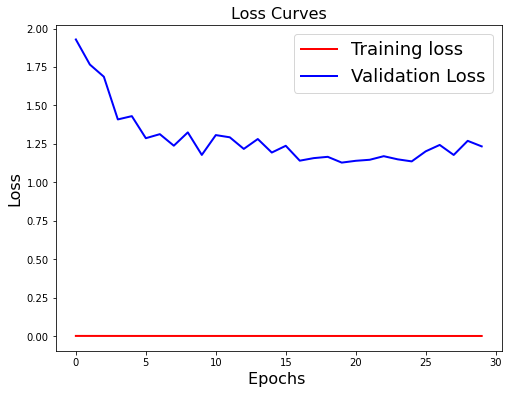

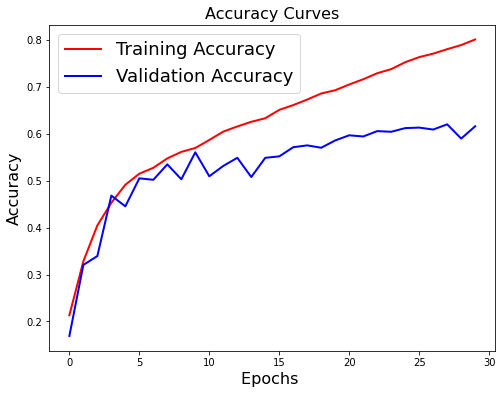

In [ ]:
#Plotting accuracy and loss curves for 2nd model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_cnn_1.history['loss'],'r',linewidth=2.0)
plt.plot(history_cnn_1.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_cnn_1.history['accuracy'],'r',linewidth=2.0)
plt.plot(history_cnn_1.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
model.save('drive/My Drive/Colab Notebooks/cnn_1.h5')


In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('drive/My Drive/Colab Notebooks/cnn_1.h5')

In [ ]:
datagen = ImageDataGenerator(
        zoom_range=0.2,          # randomly zoom into images
        rotation_range=10,       # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,    # randomly flip images
        vertical_flip=False)     # randomly flip images

In [ ]:
#Creating 2nd model and training(fitting)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 128
epochs = 30

# Fit the model on the batches generated by datagen.flow().
history_cnn_2 = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
    epochs = epochs, 
    validation_data=(X_test, y_test), 
    class_weight=class_weight)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
225/225 [==============================] - 671s 3s/step - loss: 3.8653e-04 - accuracy: 0.4913 - val_loss: 1.1940 - val_accuracy: 0.5570
Epoch 2/30
225/225 [==============================] - 671s 3s/step - loss: 3.1281e-04 - accuracy: 0.5090 - val_loss: 1.1283 - val_accuracy: 0.5818
Epoch 3/30
225/225 [==============================] - 673s 3s/step - loss: 2.9897e-04 - accuracy: 0.5243 - val_loss: 1.1227 - val_accuracy: 0.5804
Epoch 4/30
225/225 [==============================] - 673s 3s/step - loss: 2.9777e-04 - accuracy: 0.5273 - val_loss: 1.1882 - val_accuracy: 0.5500
Epoch 5/30
225/225 [==============================] - 672s 3s/step - loss: 2.8637e-04 - accuracy: 0.5388 - val_loss: 1.0894 - val_accuracy: 0.5807
Epoch 6/30
225/225 [==============================] - 672s 3s/step - loss: 2.8628e-04 - accuracy: 0.5428 - val_loss: 1.1473 - val_accuracy: 0.5606
Epoch 7/30
225/225 [======================

Ploting accurany and Loss Curves

Text(0.5, 1.0, 'Accuracy Curves')

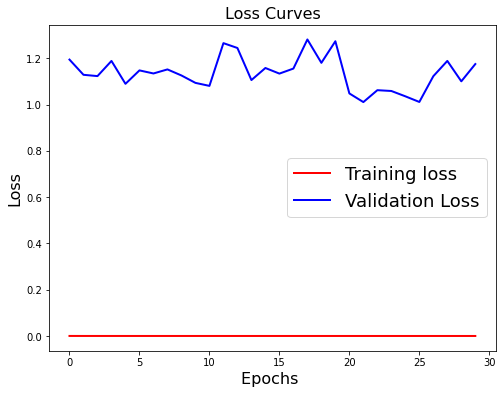

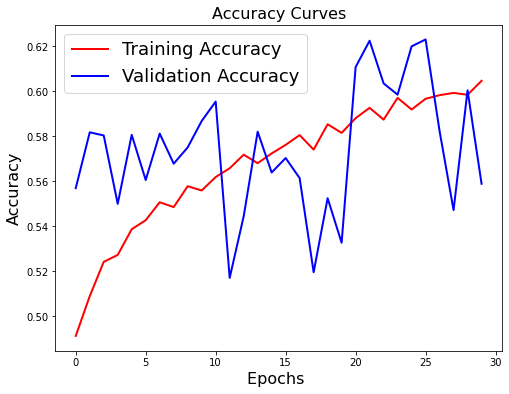

In [ ]:
#Plotting accuracy and loss curves for 2nd model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_cnn_2.history['loss'],'r',linewidth=2.0)
plt.plot(history_cnn_2.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_cnn_2.history['accuracy'],'r',linewidth=2.0)
plt.plot(history_cnn_2.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
model.save('drive/My Drive/Colab Notebooks/cnn_2.h5')

In [30]:
def entry_flow(inputs) :
    
    x = Conv2D(32, 3, strides = 2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(64,3,padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    previous_block_activation = x
    
    for size in [64, 128, 256] :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = MaxPooling2D(3, strides=2, padding='same')(x)
        
        residual = Conv2D(size, 1, strides=2, padding='same')(previous_block_activation)
        
        x = tensorflow.keras.layers.Add()([x, residual])
        previous_block_activation = x
    
    return x

In [31]:
def middle_flow(x, num_blocks=8) :
    
    previous_block_activation = x
    
    for _ in range(num_blocks) :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = tensorflow.keras.layers.Add()([x, previous_block_activation])
        previous_block_activation = x
    
    return x

In [32]:
def exit_flow(x) :
    
    previous_block_activation = x
    
    x = Activation('relu')(x)
    x = SeparableConv2D(256, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    
    residual = Conv2D(1024, 1, strides=2, padding='same')(previous_block_activation)
    x = tensorflow.keras.layers.Add()([x, residual])
      
    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = GlobalAveragePooling2D()(x)

    x = Dense(7, activation='softmax', activity_regularizer=l2(0.001))(x)
    
    return x

In [33]:
inputs = Input(shape=(shape_x, shape_y, 1))

outputs = exit_flow(middle_flow(entry_flow(inputs)))
xception = Model(inputs, outputs)

xception.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 24, 24, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_36 (BatchNo (None, 24, 24, 32)   128         conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation_36 (Activation)      (None, 24, 24, 32)   0           batch_normalization_36[0][0]     
_______________________________________________________________________________________

In [17]:
batch_size = 32
epochs = 50

earlyStopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=0, mode='max')
mcp_save = ModelCheckpoint('drive/My Drive/FilRouge/xception_1.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr_acc = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='max')

xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_xception_1 = xception.fit(
    X_train.reshape(-1,shape_x,shape_y,1), y_train, 
    batch_size=batch_size, 
    callbacks=[earlyStopping, mcp_save, reduce_lr_acc],
    epochs = epochs, 
    validation_data = (X_test, y_test) , 
    class_weight = class_weight)

Epoch 1/50
898/898 [==============================] - 610s 679ms/step - loss: 5.9781e-04 - accuracy: 0.3152 - val_loss: 1.8429 - val_accuracy: 0.2073
Epoch 2/50
898/898 [==============================] - 609s 678ms/step - loss: 5.7665e-04 - accuracy: 0.3844 - val_loss: 1.7734 - val_accuracy: 0.3592
Epoch 3/50
898/898 [==============================] - 606s 675ms/step - loss: 5.6157e-04 - accuracy: 0.4362 - val_loss: 1.9638 - val_accuracy: 0.2140
Epoch 4/50
898/898 [==============================] - 605s 674ms/step - loss: 5.4814e-04 - accuracy: 0.4764 - val_loss: 1.8404 - val_accuracy: 0.2182
Epoch 5/50
898/898 [==============================] - 608s 677ms/step - loss: 5.3782e-04 - accuracy: 0.5052 - val_loss: 1.6424 - val_accuracy: 0.3396
Epoch 6/50
898/898 [==============================] - 611s 680ms/step - loss: 5.2591e-04 - accuracy: 0.5330 - val_loss: 1.6765 - val_accuracy: 0.3787
Epoch 7/50
898/898 [==============================] - 604s 672ms/step - loss: 5.1818e-04 - accuracy:

Text(0.5, 1.0, 'Accuracy Curves')

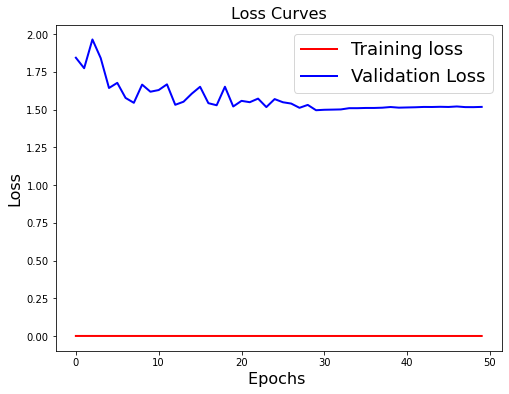

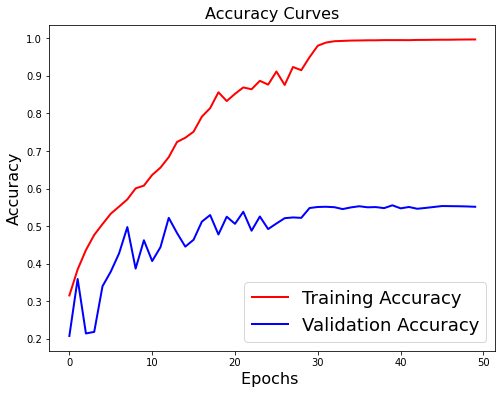

In [35]:
#Plotting accuracy and loss curves for 2nd model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_xception_1.history['loss'],'r',linewidth=2.0)
plt.plot(history_xception_1.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_xception_1.history['accuracy'],'r',linewidth=2.0)
plt.plot(history_xception_1.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [37]:
xception.save('drive/My Drive/Colab Notebooks/xcpetion_02.h5')